Input the total amount of random numbers for each axis: 30
how many rand numbers we created? 30
how many rand numbers we created? 30
how many rand numbers we created? 30


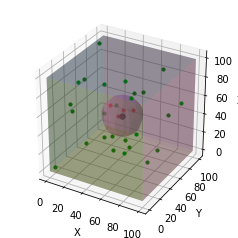

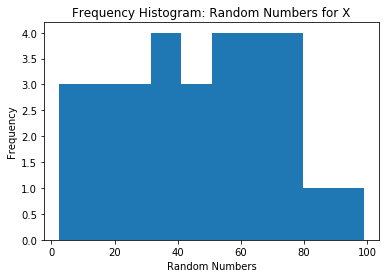

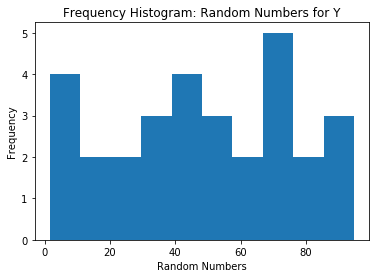

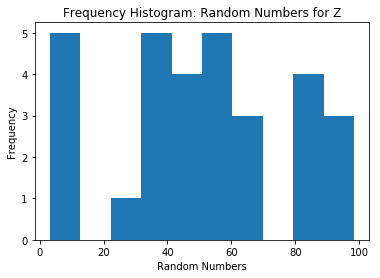

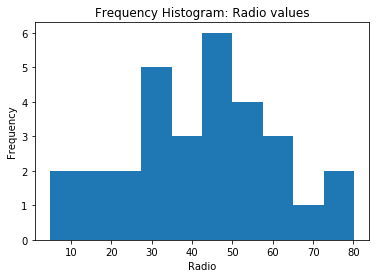

4


In [4]:
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from itertools import product, combinations

###########################################
#######   RNG 1 : Congruential   ##########
###########################################

def rng1(c, lower_limit, upper_limit, iteration):     # multiplier, increment, module, seed
    alpha = 7**5; m = (2**31)-1; seed = time.time()
    x = ( (alpha * seed) + c) % m    
    numbr_list = []    #this stores a list of different random numbers
    while len(numbr_list) < iteration:   #check that the number is unique before adding it to the random number list
        x = ( (alpha * x) + c) % m   #generate first random number
        numbr_list.append(x)
    print("how many rand numbers we created?",len(numbr_list))
    for i in range(len(numbr_list)):
        numbr_list[i] /= m
        numbr_list[i] = ((upper_limit-lower_limit)*numbr_list[i]) + lower_limit
    return numbr_list

def prime_check(num):
    modularity = []
    for i in range(1,num):
        modularity.append(num%i)
    if modularity.count(0) == 1:
        print("prime condition approved", num)

#this set up the value of the seed to be used to generate random numbers
#the length of possible values is "m - 1"

iteration = int(input("Input the total amount of random numbers for each axis: "))

random_arr1 = rng1(0, 0, 100, iteration)  # X-values
random_arr2 = rng1(0, 0, 100, iteration)  # Y-values
random_arr3 = rng1(0, 0, 100, iteration)  # Z-values
  
#ensure that m is always bigger than the multiplier, increment, and the seed
#convert result to random values dividing them by module

###########################################
###########   Shape drawing   #############
###########################################

# draw cube

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
r = [0,100]
X, Y = np.meshgrid(r, r)
#alpha represent the transparency level
ax.plot_surface(X,Y,100, alpha=0.3)
ax.plot_surface(X,Y,0, alpha=0.3)
ax.plot_surface(X,0,Y, alpha=0.3)
ax.plot_surface(X,100,Y, alpha=0.3)
ax.plot_surface(100,X,Y, alpha=0.3)
ax.plot_surface(0,X,Y, alpha=0.3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_aspect("equal")

# draw sphere
u, v = np.mgrid[0:2*np.pi:10j, 0:np.pi:10j]
x = 50+20*np.cos(u)*np.sin(v)
y = 50+20*np.sin(u)*np.sin(v)
z = 50+20*np.cos(v)
ax.plot_surface(x,y,z, alpha=0.4)
#ax.plot_wireframe(x, y, z, color="g")

# draw a point
ax.scatter([50], [50], [50], color="black", s=30)
radio_arr = []

for i in range(len(random_arr1)):
    radio = ((random_arr1[i]-50)**2 + (random_arr2[i]-50)**2 + (random_arr3[i]-50)**2)**0.5
    if radio <= 20:
        ax.scatter([random_arr1[i]], [random_arr2[i]], [random_arr3[i]], color="r", s=10), radio
        radio_arr.append(radio)
    else:
        ax.scatter([random_arr1[i]], [random_arr2[i]], [random_arr3[i]], color="g", s=10), radio
        radio_arr.append(radio)

plt.show()


#Histograms
def histogram_graph(array, title, label):
    plt.hist(array)
    plt.title(title)
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.show()

histogram_graph(random_arr1, "Frequency Histogram: Random Numbers for X", "Random Numbers")
histogram_graph(random_arr2, "Frequency Histogram: Random Numbers for Y", "Random Numbers")
histogram_graph(random_arr3, "Frequency Histogram: Random Numbers for Z", "Random Numbers")
histogram_graph(radio_arr, "Frequency Histogram: Radio values", "Radio")

radio_values = np.array(radio_arr)
print(len(radio_values[radio_values<20]))